# Clustering con Python

### Importar el dataset

In [1]:
import pandas as pd

In [5]:
df = pd.read_csv("../datasets/wine/winequality-red.csv", sep = ";")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.shape

(1599, 12)

In [7]:
import matplotlib.pyplot as plt

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

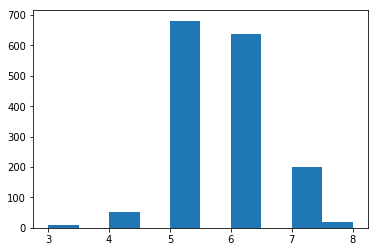

In [8]:
plt.hist(df["quality"])

In [9]:
df.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


### Normalización de los datos

In [10]:
df_norm = (df-df.min())/(df.max()-df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


## Clustering jerárquico con scikit-learn

In [11]:
from sklearn.cluster import AgglomerativeClustering

In [12]:
clus= AgglomerativeClustering(n_clusters=6, linkage="ward").fit(df_norm)

In [30]:
md_h = pd.Series(clus.labels_)

Text(0,0.5,'Número de vinos del cluster')

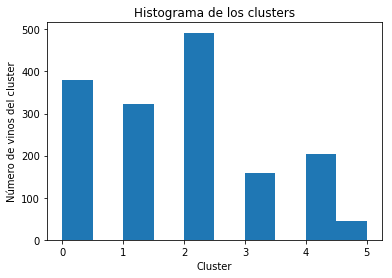

In [31]:
plt.hist(md_h)
plt.title("Histograma de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Número de vinos del cluster")

In [17]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]])

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [20]:
Z = linkage(df_norm, "ward")

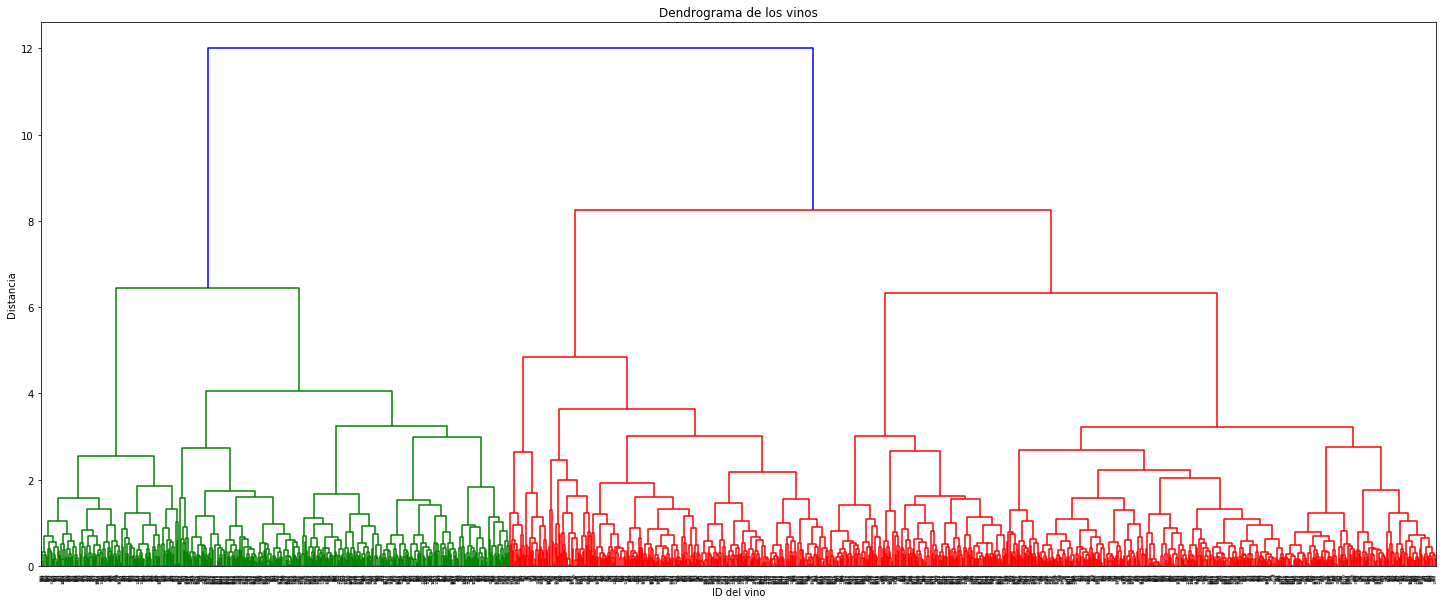

In [23]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma de los vinos")
plt.xlabel("ID del vino")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90., leaf_font_size=4.)
plt.show()

## K-means

In [25]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [26]:
model = KMeans(n_clusters=6)
model.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
model.labels_

array([3, 3, 3, ..., 0, 0, 4], dtype=int32)

In [29]:
md_k = pd.Series(model.labels_)

In [32]:
df_norm["clust_h"] = md_h
df_norm["clust_k"] = md_k

In [33]:
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,3
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,3
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,3
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,3


(array([229.,   0., 247.,   0.,  32.,   0., 499.,   0., 274., 318.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

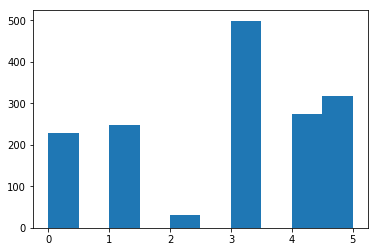

In [34]:
plt.hist(md_k)

In [35]:
model.cluster_centers_

array([[0.17556131, 0.32434049, 0.08882096, 0.0943052 , 0.09611361,
        0.24952334, 0.12330458, 0.32533392, 0.57751951, 0.18442591,
        0.48708991, 0.60960699],
       [0.58353337, 0.20590927, 0.51210526, 0.13429649, 0.13073071,
        0.13941951, 0.09204446, 0.65638172, 0.33150563, 0.22165386,
        0.2924115 , 0.54817814],
       [0.3340708 , 0.28745719, 0.474375  , 0.07427226, 0.5235288 ,
        0.20202465, 0.20781802, 0.51495962, 0.24187992, 0.57541168,
        0.16394231, 0.4625    ],
       [0.26362459, 0.36105087, 0.12016032, 0.09147748, 0.12277309,
        0.14433092, 0.10790486, 0.49221792, 0.48670569, 0.15529262,
        0.21852423, 0.43927856],
       [0.36202442, 0.16017148, 0.41905109, 0.10378962, 0.10596127,
        0.1598643 , 0.08302597, 0.41531882, 0.42059888, 0.23565278,
        0.47894441, 0.69124088],
       [0.31627428, 0.2775588 , 0.30345912, 0.15174033, 0.12611165,
        0.38092391, 0.29696424, 0.5387656 , 0.43735453, 0.17843558,
        0.21498145,

In [36]:
model.inertia_

186.55601831533752

## Interpretación final

In [38]:
df_norm.groupby("clust_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clust_k,,,,,,,,,,,,,
0,0.175561,0.324340,0.088821,0.094305,0.096114,0.249523,0.123305,0.325334,0.577520,0.184426,0.487090,0.609607,3.423581
1,0.583533,0.205909,0.512105,0.134296,0.130731,0.139420,0.092044,0.656382,0.331506,0.221654,0.292412,0.548178,2.024291
2,0.334071,0.287457,0.474375,0.074272,0.523529,0.202025,0.207818,0.514960,0.241880,0.575412,0.163942,0.462500,4.906250
3,0.263625,0.361051,0.120160,0.091477,0.122773,0.144331,0.107905,0.492218,0.486706,0.155293,0.218524,0.439279,2.022044
4,0.362024,0.160171,0.419051,0.103790,0.105961,0.159864,0.083026,0.415319,0.420599,0.235653,0.478944,0.691241,0.135036
5,0.316274,0.277559,0.303459,0.151740,0.126112,0.380924,0.296964,0.538766,0.437355,0.178436,0.214981,0.454717,1.034591
